In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
milk = pd.read_csv('../Datasets/milk.csv', index_col=0)
std = StandardScaler()
milk_scl = std.fit_transform(milk)

In [3]:
inertia = []
scores = []

for i in range(2,11):
    km = KMeans(random_state=252, n_clusters=i)
    km.fit(milk_scl)
    scores.append([i,silhouette_score(milk_scl, km.labels_)])
    inertia.append([i,km.inertia_])

scores = pd.DataFrame(scores, columns=['neigh','score'])
inertia = pd.DataFrame(inertia, columns=['neigh','inertia'])

scores.sort_values('score', ascending=False)

,neigh,score
0,2,0.525851
2,4,0.443481
3,5,0.398301
6,8,0.378269
7,9,0.376686
1,3,0.370679
4,6,0.364249
5,7,0.356037
8,10,0.325211


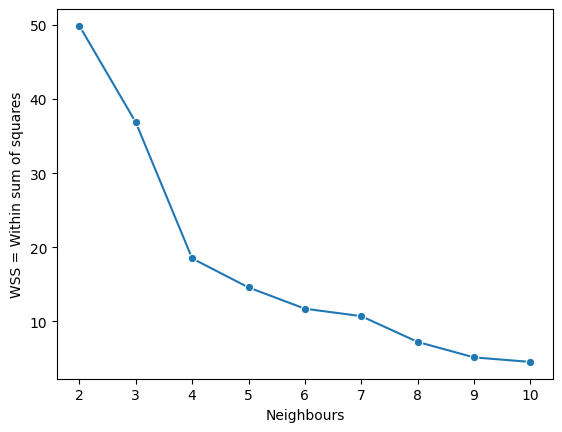

In [4]:
plt.xlabel('Neighbours')
plt.ylabel('WSS = Within sum of squares')
sns.lineplot(data = inertia, x='neigh', y='inertia', marker='o')
plt.show()

In [7]:
cluster = KMeans(n_clusters=2)
cluster.fit(milk_scl)
milk_copy = milk.copy()

milk_copy['cluster'] = cluster.labels_
milk_copy.sort_values('cluster')

,water,protein,fat,lactose,ash,cluster
Animal,,,,,,
DOLPHIN,44.9,10.6,34.9,0.9,0.53,0
SEAL,46.4,9.7,42.0,0.0,0.85,0
REINDEER,64.8,10.7,20.3,2.5,1.40,0
WHALE,64.8,11.1,21.2,1.6,1.70,0
DEER,65.9,10.4,19.7,2.6,1.40,0
RAT,72.5,9.2,12.6,3.3,1.40,0
RABBIT,71.3,12.3,13.1,1.9,2.30,0
DOG,76.3,9.3,9.5,3.0,1.20,0
HORSE,90.1,2.6,1.0,6.9,0.35,1


In [8]:
milk_copy.groupby('cluster').mean()

,water,protein,fat,lactose,ash
cluster,,,,,
0,63.362500,10.412500,21.662500,1.975000,1.347500
1,85.158824,4.235294,4.964706,5.147059,0.635294


In [9]:
milk_copy[milk_copy['cluster'] == 0]

,water,protein,fat,lactose,ash,cluster
Animal,,,,,,
DOG,76.3,9.3,9.5,3.0,1.20,0
RABBIT,71.3,12.3,13.1,1.9,2.30,0
RAT,72.5,9.2,12.6,3.3,1.40,0
DEER,65.9,10.4,19.7,2.6,1.40,0
REINDEER,64.8,10.7,20.3,2.5,1.40,0
WHALE,64.8,11.1,21.2,1.6,1.70,0
SEAL,46.4,9.7,42.0,0.0,0.85,0
DOLPHIN,44.9,10.6,34.9,0.9,0.53,0


In [10]:
milk_copy[milk_copy['cluster'] == 1]

,water,protein,fat,lactose,ash,cluster
Animal,,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35,1
ORANGUTAN,88.5,1.4,3.5,6.0,0.24,1
MONKEY,88.4,2.2,2.7,6.4,0.18,1
DONKEY,90.3,1.7,1.4,6.2,0.40,1
HIPPO,90.4,0.6,4.5,4.4,0.10,1
CAMEL,87.7,3.5,3.4,4.8,0.71,1
BISON,86.9,4.8,1.7,5.7,0.90,1
BUFFALO,82.1,5.9,7.9,4.7,0.78,1
GUINEA PIG,81.9,7.4,7.2,2.7,0.85,1


similar on nutrient data


In [15]:
nutrients = pd.read_csv('../Datasets/nutrient.csv', index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
nutrients_scl = scaler.fit_transform(nutrients)

inertia = []
scores = []

for i in range(2,11):
    km = KMeans(random_state=25, n_clusters=i)
    km.fit(nutrients_scl)
    scores.append([i,silhouette_score(nutrients_scl, km.labels_)])
    inertia.append([i,km.inertia_])

scores = pd.DataFrame(scores, columns=['neigh','score'])
inertia = pd.DataFrame(inertia, columns=['neigh','inertia'])

scores.sort_values('score', ascending=False)

,neigh,score
2,4,0.419974
5,7,0.402943
4,6,0.381370
3,5,0.378018
7,9,0.377910
6,8,0.377523
8,10,0.366987
1,3,0.357822
0,2,0.325778


In [24]:
cluster = KMeans(random_state=25,n_clusters=4)
cluster.fit(nutrients_scl)
nutrients_copy = nutrients.copy()

nutrients_copy['cluster'] = cluster.labels_
nutrients_copy.sort_values('cluster')

,energy,protein,fat,calcium,iron,cluster
Food_Item,,,,,,
MACKEREL CANNED,155,16,9,157,1.8,0
SARDINES CANNED,180,22,9,367,2.5,0
SALMON CANNED,120,17,5,159,0.7,0
BEEF BRAISED,340,20,28,9,2.6,1
PORK ROAST,340,19,29,9,2.5,1
BEEF ROAST,420,15,39,7,2.0,1
BEEF STEAK,375,19,32,9,2.6,1
PORK SIMMERED,355,19,30,9,2.4,1
LAMB SHOULDER ROAST,300,18,25,9,2.3,1


In [25]:
nutrients_copy.groupby('cluster').mean()

,energy,protein,fat,calcium,iron
cluster,,,,,
0,151.666667,18.333333,7.666667,227.666667,1.666667
1,341.875000,18.750000,28.875000,8.750000,2.437500
2,163.928571,20.714286,7.714286,19.857143,2.028571
3,57.500000,9.000000,1.000000,78.000000,5.700000


In [26]:
nutrients_copy[nutrients_copy['cluster'] == 0]

,energy,protein,fat,calcium,iron,cluster
Food_Item,,,,,,
MACKEREL CANNED,155,16,9,157,1.8,0
SALMON CANNED,120,17,5,159,0.7,0
SARDINES CANNED,180,22,9,367,2.5,0


In [27]:
nutrients_copy[nutrients_copy['cluster'] == 1]

,energy,protein,fat,calcium,iron,cluster
Food_Item,,,,,,
BEEF BRAISED,340,20,28,9,2.6,1
BEEF ROAST,420,15,39,7,2.0,1
BEEF STEAK,375,19,32,9,2.6,1
LAMB LEG ROAST,265,20,20,9,2.6,1
LAMB SHOULDER ROAST,300,18,25,9,2.3,1
SMOKED HAM,340,20,28,9,2.5,1
PORK ROAST,340,19,29,9,2.5,1
PORK SIMMERED,355,19,30,9,2.4,1
